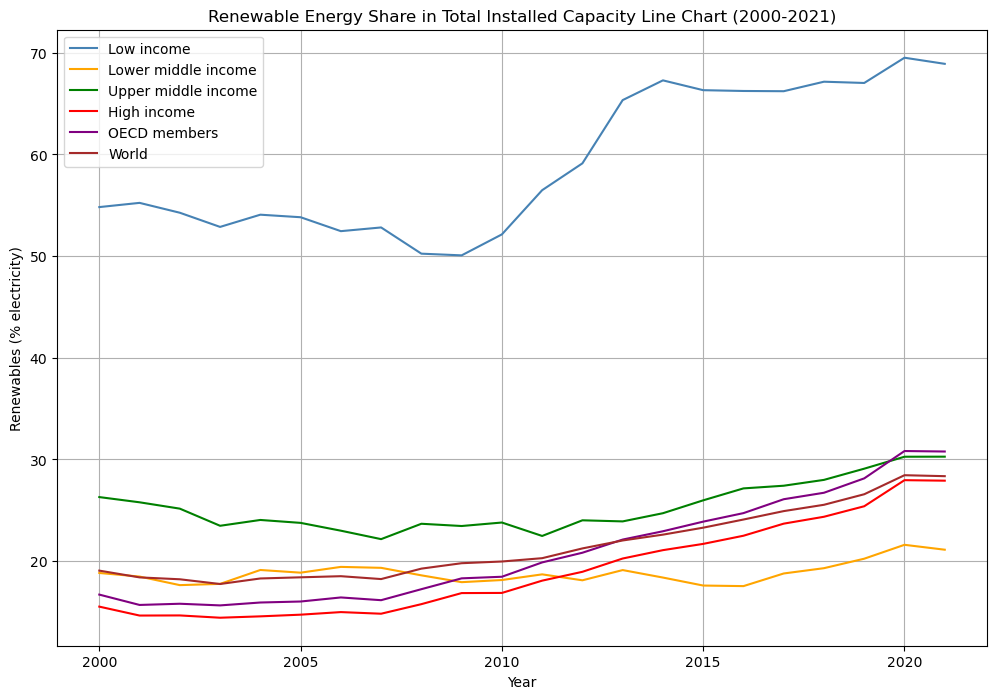

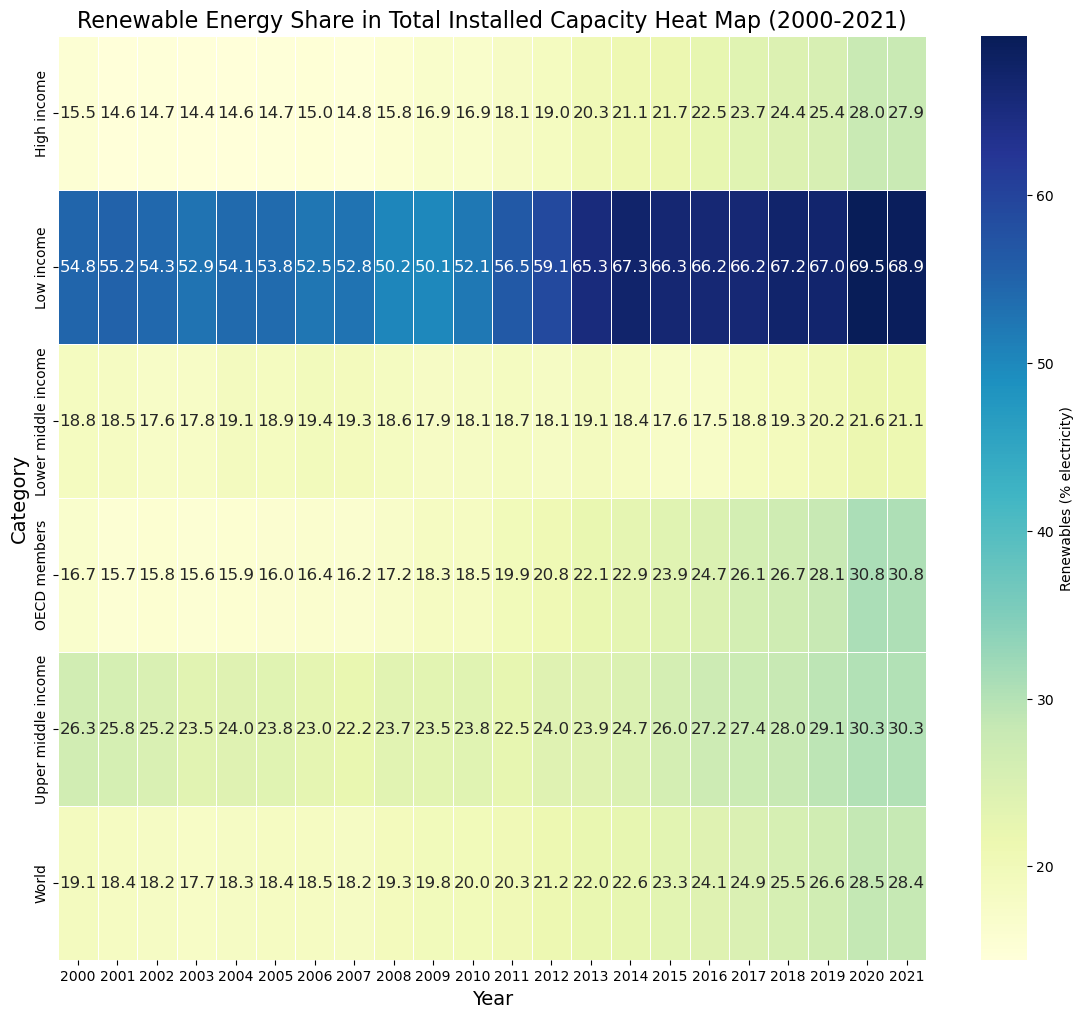

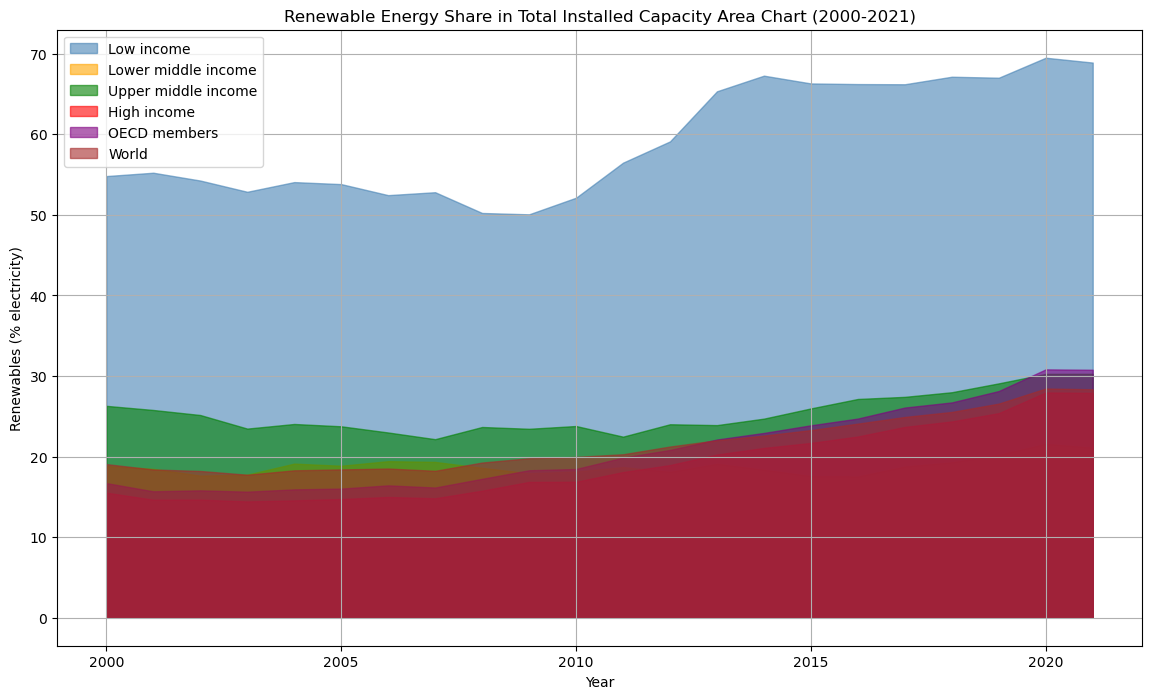

Entity,Actual(2021),LR(2022),RF(2022),GB(2022)
Low income,68.909650,69.742931,68.568382,69.498672
Lower middle income,21.122948,19.412447,20.963966,21.589248
Upper middle income,30.273745,27.636939,29.631886,30.257950
High income,27.912779,26.360590,26.829581,27.960541
OECD members,30.781162,29.109231,29.598784,30.826115
World,28.355785,26.917748,27.575301,28.448261


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
data = pd.read_csv('CSV_7.2.1.csv')

# Define the groups of interest and filter the data
groups = ["Low income", "Lower middle income", "Upper middle income", "High income", "OECD members", "World"]
data_filtered = data[data['Entity'].isin(groups)]

# Define the years of interest
years = list(map(int, range(2000, 2022)))

# Filter the data for the years and groups of interest
data_filtered_years = data_filtered[data_filtered['Year'].isin(years)]

# Define the colors as per user's request
colors_dict = {
    "Low income": 'steelblue',
    "Lower middle income": 'orange',
    "Upper middle income": 'green',
    "High income": 'red',
    "OECD members": 'purple',
    "World": 'brown'
}

# Create the line chart (Chart 5.10)
plt.figure(figsize=(12, 8))
for entity in groups:
    entity_data = data_filtered_years[data_filtered_years['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Renewables (% electricity)'], label=entity, color=colors_dict[entity])
plt.title('Renewable Energy Share in Total Installed Capacity Line Chart (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Renewables (% electricity)')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for heatmap (Chart 5.11)
heatmap_data = data_filtered_years.pivot(index='Entity', columns='Year', values='Renewables (% electricity)')

# Create the refined heatmap with Y-Axis label as "Category"
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Renewables (% electricity)'},
            annot_kws={"size": 12}, linewidths=.5)
plt.title('Renewable Energy Share in Total Installed Capacity Heat Map (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

# Prepare data for area chart (Chart 5.12)
area_chart_data = data_filtered_years.pivot(index='Year', columns='Entity', values='Renewables (% electricity)')

# Create the unstacked area chart
plt.figure(figsize=(14, 8))
for entity in groups:
    entity_data = area_chart_data[entity]
    plt.fill_between(area_chart_data.index, entity_data, label=entity, color=colors_dict[entity], alpha=0.6)
plt.title('Renewable Energy Share in Total Installed Capacity Area Chart (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Renewables (% electricity)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Predicted Renewable Energy Share in Total Installed Capacity for 2023 (Table 5.4)
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#Remove warning
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
#data = pd.read_csv('/mnt/data/share-electricity-renewables-r.csv')
data = pd.read_csv('CSV_7.2.1.csv')

# Filter data
groups = ["Low income", "Lower middle income", "Upper middle income", "High income", "OECD members", "World"]
data_filtered = data[data['Entity'].isin(groups)]
years = list(map(int, range(2000, 2022)))
data_filtered_years = data_filtered[data_filtered['Year'].isin(years)]

# Initialize regression models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Dataframe to store the predictions
predictions = pd.DataFrame(columns=['Entity', 'Actual(2021)', 'LR(2022)', 'RF(2022)', 'GB(2022)'])

# Forecasting
for entity in groups:
    entity_data = data_filtered_years[data_filtered_years['Entity'] == entity]
    X = entity_data[['Year']]
    y = entity_data['Renewables (% electricity)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, shuffle=False)
    
    # Train models
    lin_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)
    gb_reg.fit(X_train, y_train)
    
    # Predict values for 2022
    lin_pred = lin_reg.predict([[2022]])[0]
    rf_pred = rf_reg.predict([[2022]])[0]
    gb_pred = gb_reg.predict([[2022]])[0]
    
    # Store results
    predictions = predictions.append({
        'Entity': entity,
        'Actual(2021)': y_test.values[0],
        'LR(2022)': lin_pred,
        'RF(2022)': rf_pred,
        'GB(2022)': gb_pred
    }, ignore_index=True)

# Display the improved table without the index and the "Entity" label
styled_table = predictions.style.set_table_styles({
    '': [{'selector': 'th',
          'props': [('font-size', '14pt'), 
                    ('text-align', 'center'),
                    ('background-color', 'lightgrey')]},
         {'selector': 'td',
          'props': [('font-size', '13pt'),
                    ('text-align', 'center')]}]
}).hide_index().set_properties(**{'background-color': 'white', 'color': 'black'}).set_caption("Predicted Value 2022 (%)")

# Remove the "Entity" label from the header
styled_table.columns.name = None

styled_table

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM